In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [8]:
from helpers import load_data

# load dataset
x, y = load_data()
print(x.shape, y.shape)

(50,) (50,)


In [167]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

ind = build_k_indices(y, 4, np.random.seed(2))
# print(ind)
# print(y[ind])

In [172]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    # get k'th subgroup in test, others in train: TODO
    ind_train = k_indices # get k's row of indices
    ind_test = np.concatenate((k_indices[:k],k_indices[k+1:]),axis=0) # get all the rest of indices
    y_train = y[ind_train]
    x_train = x[ind_train]
    y_test = y[ind_test]
    x_test = x[ind_test]

#     print(x_test.shape, y_test.shape)

    # form data with polynomial degree
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
#     print("tx_train:", tx_train, "\n")
#     print("tx_test:", tx_test, "\n")

    # ridge regression:
    mse, w_opt = ridge_regression(y_train, tx_train, lambda_)
    rmse_train = np.sqrt(2*mse)

    # calculate the loss for train and test data
    loss_tr = rmse_train  # training error
    loss_te = np.sqrt(2*compute_mse(y_test, tx_test, w_opt))   # test error
    
    return loss_tr, loss_te

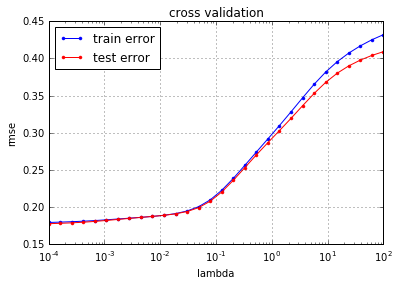

In [173]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # cross validation: TODO
    # ***************************************************  
    
    for lamb in lambdas:
        rmse_train = 0
        rmse_test = 0
        for k_i in k_indices:
            temp_loss_train, temp_loss_test = cross_validation(y, x, k_i, k_fold, lamb, degree)
            rmse_train += temp_loss_train
            rmse_test += temp_loss_test
            
        rmse_tr.append(rmse_train/k_fold)
        rmse_te.append(rmse_test/k_fold)

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()